# Middle Passage - Historical

### Grayson Arthofer

## Trans-Atlantic Slave Trade

In this project, I will uncover some of the numbers behind the Trans-atlantic slave trade (TAST), also known as the middle passage, that brought African slaves to the Americas.  The middle passage is reported to have forcibly migrated over 10 million Africans to the Americas over a roughly 3 century time span.  Many aspects of the TAST is little known by most people, such as the countries that constituted this network of slave ships, the regions from which the slaves were taken, and the number of slaves captured from Africa.

**Part 1.** The data.

1. Read in the Trans-Atlantic Slave Trade database with Pandas.
2. Create a list describing the meaning of each column. 

In [1]:
import pandas as pd
import numpy as np
!pip install plotnine
import plotnine as p9

In [4]:
ShipData = pd.read_csv('/Users/graysonarthofer/Desktop/STA141B/midterm/tastdb-2010.csv', encoding = 'latin-1')

In [5]:
##https://stackoverflow.com/questions/13445241/replacing-blank-values-white-space-with-nan-in-pandas
ShipData = ShipData.replace(r'^\s*$', np.NaN, regex=True)
ShipData.head()

,voyageid,evgreen,shipname,national,natinimp,placcons,yrcons,placreg,yrreg,rig,...,sourcei,sourcej,sourcek,sourcel,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer
0,1,1,Pastora de Lima,4,6,NaN,NaN,NaN,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,Tibério,NaN,6,NaN,NaN,NaN,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,Paquete Real,NaN,6,NaN,NaN,NaN,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,Bom Caminho,NaN,6,NaN,NaN,NaN,NaN,40,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,Benigretta,NaN,6,NaN,NaN,NaN,NaN,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* voyageid - Id number of the voyage
* evgreen - Voyage i n 1999 CD-ROM
* shipname - Name of vessel
* national - Country in which ship registered
* placcons - Place wherevessel constructed
* yrcons - Year of construction
* placreg - Place where the vessel was registered
* yrreg - Year the vessel was registered
* rig - Type of ship
* tonnage - Tonnage of vessel
* tonmod - Definition of ton used in British tonnage
* guns - Guns mounted
* ownera-p - The owners of the vessel
* fate/fate1/../fate2 - The different outcomes of the voyage
* resistance - Blank for no resistance. 1 through 6 value for different types of resistance
* ptdepimp - Imputed port where voyage began
* plac1/2/3tra - First/second/third place a slave purchase
* mjbyptimp - Imputed principal place of slave purchase
* npafttra - Port of call before Atlantic crossing
* adpsale1/2 - Second/ third place of slave landing
* mjslptimp - Imputed principal port of slave disembarkation
* portret - Place at which voyage ended
* yearam - Year of voyage
* Date_dep/ Date_buy/ Date_leftAfr/ Date_land1/ Date_depam/ Date_end - Date of departure/ slaves bought/ last slaving port/ first place slaves landed/ return voyage/ date complete
* voy1/2imp - Unkown
* captaina/b/c - Names of captains
* crew1/3/died - crew size at voyage outset/ crew size at first landing of slaves/ crew deaths
* slintend - Slaves intended from first port of purchase
* ncar13/15/17 - Slaves carried from first/second/third port of purchase
* tslavesd - Total slaves on board at departure from last slaving
* slaximp - How many slaves enbarked
* slasrriv - How many slaves survived upon arrival
* slas32/36/39 - Slaves disembarked at first/second/third place
* slamimp - Imputed total slaves
* menrat7/womrat7 - Percent men captives/ percent women captives
* boyrat7/girlrat7 - Percent boy captives/ percent girl captives
* malrat7/chilrat7 - Male ratio/ child ratio
* jamcaspr - Average price of slaves standardized on sterling cash price of prime slaves sold in Jamaica
* vymrtrat - Slave mortality rate (slave deaths / slaves embarked)
* source(a-r) - Source of information

**Part 2.** Estimating the total number of captives.

1. I will try to estimate the number of people captured into slavery and forced through the middle passage. How much of the data is missing?
2. I will create an initial estimate of the total number of captives taken from Africa by assuming that NaN data is Missing Completely at Random (whether the variable is missing or not is independent of the variable and all other variables).
3. What other variables might be associated with missing number of captives?  Visualize these associations.

I used 'slaximp' which is defined as the total number of slaves

In [6]:
MissingData = ShipData['slaximp'].isna().sum()
TotalVoyages = len(ShipData)
print('The number of missing values is equal to',ShipData['slaximp'].isna().sum())

The number of missing values is equal to 1553


In [7]:
MissingData = ShipData['slaximp'].isna().sum() #This gives the number of expeditions where captive count is unknown
TotalVoyages = len(ShipData) #This gives the total number of rows and thus total slave ship expeditions
CompleteData = TotalVoyages-MissingData #This gives total amount of slave expeditions where captive count is known
ShipData["slaximp"] = pd.to_numeric(ShipData["slaximp"]) #Converting object to numeric
TotalCaptives = ShipData['slaximp'].sum() #The sum of known slaves captured
#Total known/(h)
print('An estimation of the total number of African slaves is', round(TotalCaptives/(CompleteData/TotalVoyages)))

An estimation of the total number of African slaves is 10631562


From a quick google search the actual number is 12.5 million which means my estimation was 2 million off.

Here, I will try to find variables associated with number of captives. 

In [8]:
#Covert voyage days and deaths from objects to integers
ShipData["vymrtimp"] = pd.to_numeric(ShipData["vymrtimp"])
ShipData["voy1imp"] = pd.to_numeric(ShipData["voy1imp"])
ShipData["yearam"] = pd.to_numeric(ShipData["yearam"])
#Plotnine

/Users/graysonarthofer/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 28609 rows containing missing values.


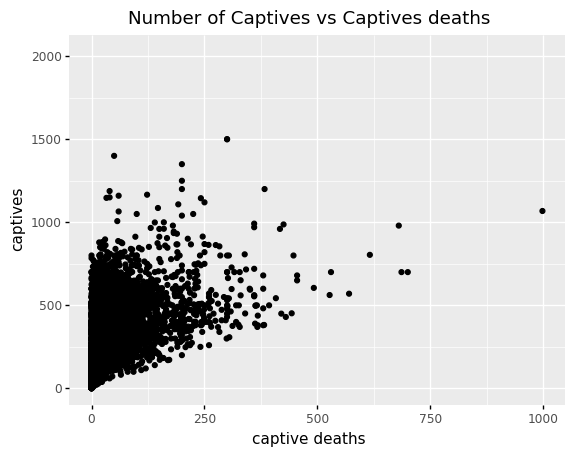

<ggplot: (8770800727013)>

In [9]:
gg = (p9.ggplot(ShipData)+
      p9.aes(x='vymrtimp', y='slaximp')+
      p9.geom_point()+
      p9.labs(title='Number of Captives vs Captives deaths', x = 'captive deaths', y = 'captives'))
gg

I chose this variable as I believed that more captives and more deaths might have a linear relationship.^

/Users/graysonarthofer/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 22378 rows containing missing values.


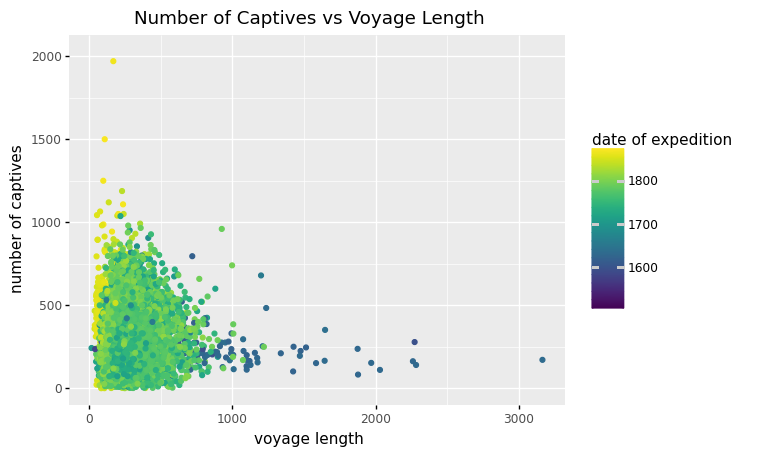

<ggplot: (8770775091818)>

In [10]:
gg = p9.ggplot(data = ShipData)
gg += p9.aes(x='voy1imp', y='slaximp') #x-axis will be deaths, y-axis will be total number of captives
gg += p9.geom_point()
gg += p9.aes(color='yearam')
gg += p9.labs(title='Number of Captives vs Voyage Length', x = 'voyage length', y = 'number of captives', color = 'date of expedition')
gg

The reasoning here is that long voyages are only justifiable is there is a large profit and thus more slaves. 

I also included date of expedition to explain why some voyages took extremely long. As seen voyages closer to the start of exploration were outliers.

**Part 3.** National orgin of ships.

1. I want to understand the trends of the nationality of the slave ships (the flag that they flew under is in the national variable).  I will filter out the values of `national` that have less than 100 voyages with that value.  
2. I need to create a variable, `flag`, that is a string of easily readable names for these values by looking them up in the pdf codebook.
3. Create visualizations that count voyages by flag as a function of voyage year.

In [11]:
VoyageCounts = ShipData['national'].value_counts()
VoyageCounts[VoyageCounts>100]

7     11009
4      5303
10     4069
9      1575
1      1249
8      1237
5       788
11      248
Name: national, dtype: int64

In [12]:
a = ShipData['national']=='7' 
b = ShipData['national']=='4'
c = ShipData['national']=='10'
d = ShipData['national']=='9' 
e = ShipData['national']=='1'
f = ShipData['national']=='8'
g = ShipData['national']=='5' 
h = ShipData['national']=='11'
y = a|b|c|d|e|f|g|h
NationData = ShipData[y]

In [13]:
NationData = NationData.copy()
NationData['flag'] = NationData['national']

In [14]:
NationData['flag'] = NationData['flag'].replace(['7','4','10','9','1','8','5','11'],
                    ['Great Britain','Portugal','France','U.S.A.','Spain',
                                        'Netherlands', 'Brazil', 'Denmark'])
#https://datatofish.com/replace-values-pandas-dataframe/

In [15]:
FlagData = NationData.groupby(['flag', 'yearam']).size().reset_index(name="Frequency")

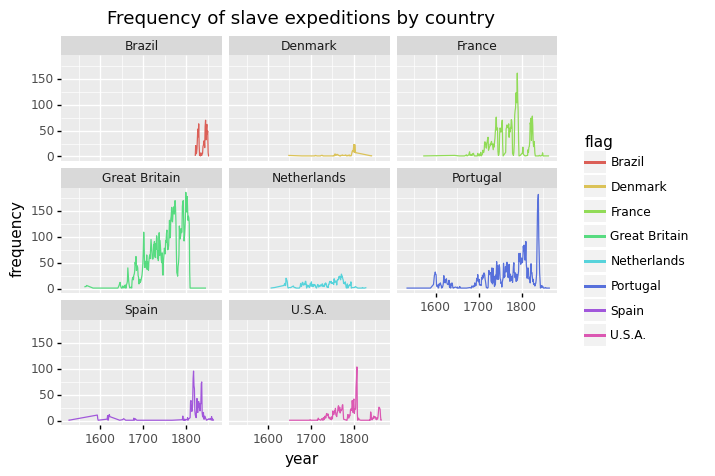

<ggplot: (8770776747361)>

In [16]:
gg = (p9.ggplot(FlagData)+
    p9.aes(x = 'yearam', y ='Frequency', color='flag')+
    p9.geom_line()+
    p9.labs(title='Frequency of slave expeditions by country', x = 'year', y = 'frequency')+
    p9.facet_wrap('~flag'))
gg
##https://plotnine.readthedocs.io/en/stable/

#### Brazil
* Brazil Declares Independence (1822) - Slave voyages start.

#### Denmark
* Denmark East Indian Co. Established (1670) - Slave voyages increase.
* Denmark abolishes slave trade (1792) - Slave voyages drop to zero.

#### France
* The Seven Years' War (1756–63) - Slave voyages drop.
* Anglo-French War (1778-1783) - Slave voyages drop.
* French Revolution (1789-1799) - First Republic bans slave trade.
* Napoleonic Wars (1803-1815) - Napoleon re-establishes the slave trade, but the French navy gets destroyed, and the British Empire blockades France for a decade. Slave voyages slightly rise and then falls.
* Slave trade abolished (1848) - Slave voyages dropped to zero after the Second Republic banned the slave trade.

#### Great Britain
* British East Indian Co. established (1600) - Slave voyages increase.
* Beginning of Caribbean sugar plantations(1650) - Slave voyages increase.
* American Revolutionary War (1775-1783) - Slave voyages drop.
* Anglo-French War (1778-1783) - Slave voyages drop.
* Anglo-Spanish War (1778-1783) - Slave voyages drop.
* 4th Anglo-Dutch War (1779-1783) - Slave voyages drop.
* Slave trade abolished (1807) - Slave voyages dropped to zero.

#### Netherlands
* Dutch East Indian Co. established (1602) - Slave voyages increase.
* Slave trade abolished (1814) - Slave voyages dropped to zero.

#### Portugal
* Portugal colonizes Brazil (1500) - Increase in the slave trade.
* Portugal Restoration (1640-1668) - Portugal fights Spain for independence. Economic collapse. Portugal loses its monopoly-like grip on the slave trade. Slave voyages drop.

#### Spain
* Latin American Wars for Independence (1810) - Slave voyages drop.
* Cuba (1810-1820) - Spain starts increasing slave voyages to Cuba.

#### U.S.A.
* American Revolutionary War (1775-1783) - Slave voyages drop.
* Slave trade abolished (1808) - Slave voyages dropped to zero.

**Part 4.** Looking at some of these ships.

1. I will use outside resources to find a slave ship and identify that ship in the data frame. I will search for the slave ship from this Wikipedia article: https://en.wikipedia.org/wiki/Brookes_(ship). 
2. Find out how common resistance (like a slave revolt) was on the ship.
3. The movie Amistad was based on a real slave ship and slave uprising. I will try to find this ship and describe what happened based on the dataframe. https://en.wikipedia.org/wiki/La_Amistad

There are 11 voyages as shown below in the new dataframe and as described in the Wiki page. 

In [17]:
BrookNat = ShipData['national']=='7' 
BrookBirth = ShipData['yrcons']=='1781'
#BrookName = ShipData['shipname']=='Brooks'
z = BrookNat&BrookBirth#&BrookName
BrookData = ShipData[z]
BrookData = BrookData.loc[BrookData['shipname'].str.contains('brook', case = False)]
BrookData

,voyageid,evgreen,shipname,national,natinimp,placcons,yrcons,placreg,yrreg,rig,...,sourcei,sourcej,sourcek,sourcel,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer
29534,80663,1,Brooks,7,7,10432,1781,10432,1781,4,...,"LST,1744-1786","Crooks,55","LList, 19 Nov 1782","LList, 25 Feb 1783","Williams,585-86",NaN,NaN,NaN,NaN,NaN
29535,80664,1,Brooks,7,7,10432,1781,10432,1783,4,...,"LST,1744-1786","Lambert,73,81-101","Lambert,73,109-21","LList, 20 July 1784","LList, 6 Aug 1784","LList, 31 Aug 1784",NaN,NaN,NaN,NaN
29536,80665,1,Brooks,7,7,10432,1781,10432,1783,4,...,"PP,1789(629),XXIV","Lambert,69,III,Appendix,Jamaica","LList, 31 Jan 1786","LList, 14 Apr 1786","Williams,585",NaN,NaN,NaN,NaN,NaN
29537,80666,1,Brooks (a) Brookes,7,7,10432,1781,10432,1786,4,...,"PP,1789(629),XXIV","Lambert,68,41-3","cc, 13 Oct 1787","craig,19","LList, 11 Dec 1787","LList, 12 Feb 1788",T70/1476,"Williams,585","Huntington,ST,vol.26,87.11.10.",NaN
29538,80667,1,Brooks,7,7,10432,1781,10432,1791,4,...,"HLRO,MP,HL,99.06.25","HLRO,MP,HL,1800.07.28","craig,19","LList, 20 Mar 1792",NaN,NaN,NaN,NaN,NaN,NaN
29539,80668,1,Brooks,7,7,10432,1781,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29540,80669,1,Brooks,7,7,10432,1781,NaN,NaN,4,...,"LList, 30 May 1797","MMM, C/EX/L/5/2,1791.050",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29541,80670,1,Brooks,7,7,10432,1781,NaN,NaN,4,...,"LList, 5 June 1798","LList, 10 July 1798","LList, 30 Oct 1798","MMM, C/EX/L/5/2,1791.050",NaN,NaN,NaN,NaN,NaN,NaN
29542,80671,1,Brooks,7,7,10432,1781,NaN,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29543,80672,1,Brooks,7,7,10432,1781,NaN,NaN,4,...,"MMM, C/EX/L/5/4,1800.169",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
ShipData["resistance"] = pd.to_numeric(ShipData["resistance"])
ShipData['ResistanceBool'] = ShipData['resistance']>=1 

In [19]:
ResistanceData = ShipData.groupby(['ResistanceBool', 'yearam']).size().reset_index(name="Frequency")

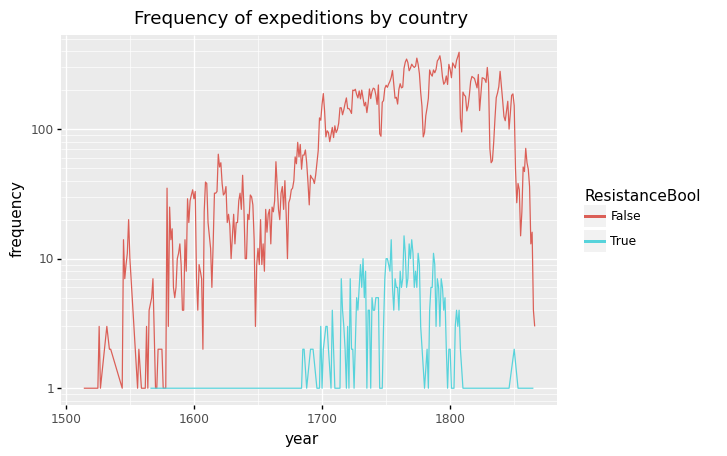

<ggplot: (8770775613693)>

In [20]:
gg = (p9.ggplot(ResistanceData)+
      p9.aes(x='yearam', y='Frequency')+
      p9.geom_line()+
      p9.aes(color='ResistanceBool')+
      p9.scale_y_log10()+
      p9.labs(title='Frequency of expeditions by country', x = 'year', y = 'frequency'))
gg

In my graph I used a log scale for the the y-axis to make it more readeable. Captive resistance only happened in about 1 in 80 voyages and so the regular scale made it hard to see dramatic differences in change. During the American Revolution there seems to be a peak in captive resistance.

In [21]:
ResistanceData = ShipData['ResistanceBool']==True
ResistanceData = ShipData[ResistanceData]
New = ResistanceData['national']=='1'
ResistanceData = ResistanceData[New]
ResistanceData

,voyageid,evgreen,shipname,national,natinimp,placcons,yrcons,placreg,yrreg,rig,...,sourcej,sourcek,sourcel,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer,ResistanceBool
2047,2071,1,Jesús María,1,3,NaN,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2305,2332,1,Dichosa Estrella,1,3,NaN,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3974,4162,1,NaN,1,3,NaN,NaN,NaN,NaN,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
5199,7551,1,Zaragozano,1,3,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [22]:
ResistanceData = ShipData['shipname']=='Amistad'
ResistanceData = ShipData[ResistanceData]
ResistanceData

,voyageid,evgreen,shipname,national,natinimp,placcons,yrcons,placreg,yrreg,rig,...,sourcej,sourcek,sourcel,sourcem,sourcen,sourceo,sourcep,sourceq,sourcer,ResistanceBool
8225,14622,1,Amistad,1,3,NaN,NaN,NaN,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
8258,14656,1,Amistad,1,3,NaN,NaN,NaN,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
8341,14742,1,Amistad,1,3,NaN,NaN,NaN,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
20702,37046,NaN,Amistad,NaN,9,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


I was unable to find this specific ship. It does not show up when I enter known details such as number of captives, name of ship, flag, etc. 

I will instead examine the Zaragoza (voyageid:7551). Zaragoza was a Spanish Baroque ship that witnessed a slave insurrection in 1810. The ship's captain was Juan Norberto Dolz, and there were 129 captives. Eleven captives died during this slave voyage.

**Part 5.** Other patterns.

1. I will try to Plot the ratio of captives that are men as a function of year. I will also try to find some associating variable that could be used to predict the ratio of men to women on board.

I used a boolean variable of 'guns' because I believed that the higher ratio of men on board might lead to a higher likelihood of having cannons on board (i.e. a higher level of security).

In [23]:
ShipData["malrat7"] = pd.to_numeric(ShipData["malrat7"])
ShipData["guns"] = pd.to_numeric(ShipData["guns"])
ShipData["Armed"] = ShipData['guns']>0

/Users/graysonarthofer/opt/anaconda3/lib/python3.8/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 31091 rows containing missing values.


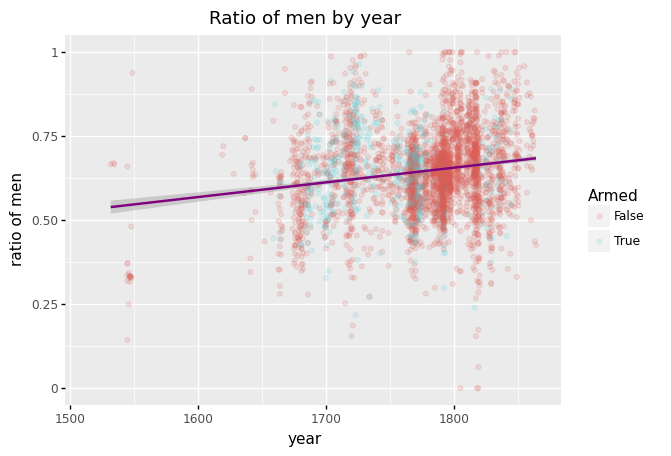

<ggplot: (8770776207782)>

In [24]:
gg = (p9.ggplot(ShipData)+
      p9.aes(x='yearam', y='malrat7')+
      p9.geom_point(alpha=.15)+
      p9.geom_smooth(color='purple')+
      p9.aes(color='Armed')+
      p9.labs(title='Ratio of men by year', x = 'year', y = 'ratio of men'))
gg

This plot shows the individual data points on the plot, the labels, and the loess regression line. As you can see, there is a heavy density of points around 1780, which means this was around the peak of the slave trade. You can see by the loess regression line that with the progression of time, more men are being taken than women. 

The aesthetic mapping is that alpha = .15. This allows the viewer to see when most of the voyages happened roughly. The aesthetic mapping of displaying the data points based on whether or not the ships had cannons lets the viewer determine the level of security these ships operated in. However, it should be noted that a False(red) only means that cannons on the ship were not documented. 